In [1]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
#loading the diabetes dataset in a pandas dataset
dataset=pd.read_csv('final yr clinical.csv')

In [3]:
#printing the first rows of our dataset
dataset.head()

subject_id  Age_cat  BMI_cat  HEART  LUNG  KIDNEY  DIABETES  HTN  IMMUNO  \
0           1        1        4      0     0       0         0    0       0   
1           2        2        2      0     0       0         0    0       0   
2           3        3        4      0     1       0         0    0       0   
3           4        1        2      0     0       0         0    0       0   
4           5        3        3      0     0       0         1    1       0   

   Resp_Symp  ...  ddimer_3_cat  ldh_3_cat  abs_neut_7_cat  abs_lymph_7_cat  \
0          1  ...             1          1              -1               -1   
1          1  ...            -1         -1              -1               -1   
2          1  ...             2          3              -1               -1   
3          1  ...             2          3              -1               -1   
4          1  ...             3         -1               3                5   

   abs_mono_7_cat  creat_7_cat  crp_7_cat  ddimer_7_cat  ldh_7_cat  \
0              -1           -1         -1            -1         -1   
1              -1           -1         -1            -1         -1   
2              -1           -1         -1            -1         -1   
3              -1           -1         -1            -1         -1   
4               3            1          4             4          3   

   Class Label  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 39 columns]

In [4]:
dataset.describe()

subject_id     Age_cat     BMI_cat       HEART        LUNG      KIDNEY  \
count  384.000000  384.000000  384.000000  384.000000  384.000000  384.000000   
mean   193.330729    3.218750    2.479167    0.184896    0.276042    0.158854   
std    111.795820    1.206623    1.151493    0.388720    0.447621    0.366017   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     96.750000    2.000000    2.000000    0.000000    0.000000    0.000000   
50%    193.500000    3.000000    2.000000    0.000000    0.000000    0.000000   
75%    290.250000    4.000000    3.000000    0.000000    1.000000    0.000000   
max    386.000000    5.000000    5.000000    1.000000    1.000000    1.000000   

         DIABETES         HTN      IMMUNO   Resp_Symp  ...  ddimer_3_cat  \
count  384.000000  384.000000  384.000000  384.000000  ...    384.000000   
mean     0.361979    0.518229    0.109375    0.953125  ...      1.119792   
std      0.481200    0.500319    0.312516    0.211647  ...      2.082182   
min      0.000000    0.000000    0.000000    0.000000  ...     -1.000000   
25%      0.000000    0.000000    0.000000    1.000000  ...     -1.000000   
50%      0.000000    1.000000    0.000000    1.000000  ...      2.000000   
75%      1.000000    1.000000    0.000000    1.000000  ...      3.000000   
max      1.000000    1.000000    1.000000    1.000000  ...      5.000000   

        ldh_3_cat  abs_neut_7_cat  abs_lymph_7_cat  abs_mono_7_cat  \
count  384.000000      384.000000       384.000000      384.000000   
mean     0.927083        0.882812         0.875000        0.893229   
std      2.101820        2.101676         2.185879        2.214728   
min     -1.000000       -1.000000        -1.000000       -1.000000   
25%     -1.000000       -1.000000        -1.000000       -1.000000   
50%      1.000000       -1.000000        -1.000000       -1.000000   
75%      3.000000        3.000000         3.000000        3.000000   
max      5.000000        5.000000         5.000000        5.000000   

       creat_7_cat   crp_7_cat  ddimer_7_cat   ldh_7_cat  Class Label  
count   384.000000  384.000000    384.000000  384.000000   384.000000  
mean      0.539062    0.580729      0.533854    0.148438     0.127604  
std       1.769641    2.206978      2.207015    1.845564     0.334084  
min      -1.000000   -1.000000     -1.000000   -1.000000     0.000000  
25%      -1.000000   -1.000000     -1.000000   -1.000000     0.000000  
50%      -1.000000   -1.000000     -1.000000   -1.000000     0.000000  
75%       2.000000    2.000000      3.000000    2.000000     0.000000  
max       5.000000    5.000000      5.000000    5.000000     1.000000  

[8 rows x 39 columns]

In [5]:
X=dataset.drop(columns='Class Label',axis=1)
Y=dataset['Class Label']

In [6]:
X

subject_id  Age_cat  BMI_cat  HEART  LUNG  KIDNEY  DIABETES  HTN  IMMUNO  \
0             1        1        4      0     0       0         0    0       0   
1             2        2        2      0     0       0         0    0       0   
2             3        3        4      0     1       0         0    0       0   
3             4        1        2      0     0       0         0    0       0   
4             5        3        3      0     0       0         1    1       0   
..          ...      ...      ...    ...   ...     ...       ...  ...     ...   
379         346        3        2      0     0       0         0    0       0   
380         348        4        2      0     0       1         0    1       0   
381         354        4        3      1     1       0         0    1       0   
382         365        5        2      0     1       0         0    0       0   
383         371        5        2      0     0       0         1    1       0   

     Resp_Symp  ...  crp_3_cat  ddimer_3_cat  ldh_3_cat  abs_neut_7_cat  \
0            1  ...          1             1          1              -1   
1            1  ...          2            -1         -1              -1   
2            1  ...          3             2          3              -1   
3            1  ...          2             2          3              -1   
4            1  ...          5             3         -1               3   
..         ...  ...        ...           ...        ...             ...   
379          1  ...          5             3         -1               3   
380          1  ...          5             4         -1               3   
381          1  ...          4             3          3               3   
382          1  ...         -1            -1         -1              -1   
383          1  ...          4             3          5              -1   

     abs_lymph_7_cat  abs_mono_7_cat  creat_7_cat  crp_7_cat  ddimer_7_cat  \
0                 -1              -1           -1         -1            -1   
1                 -1              -1           -1         -1            -1   
2                 -1              -1           -1         -1            -1   
3                 -1              -1           -1         -1            -1   
4                  5               3            1          4             4   
..               ...             ...          ...        ...           ...   
379                3               4            3          5             4   
380                2               1            3          4             5   
381                3               2            1          4             2   
382               -1              -1           -1         -1            -1   
383               -1              -1           -1         -1            -1   

     ldh_7_cat  
0           -1  
1           -1  
2           -1  
3           -1  
4            3  
..         ...  
379          2  
380         -1  
381          2  
382         -1  
383         -1  

[384 rows x 38 columns]

In [7]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
379    1
380    1
381    1
382    1
383    1
Name: Class Label, Length: 384, dtype: int64

In [8]:
X.drop(columns='subject_id',axis=1)

Age_cat  BMI_cat  HEART  LUNG  KIDNEY  DIABETES  HTN  IMMUNO  Resp_Symp  \
0          1        4      0     0       0         0    0       0          1   
1          2        2      0     0       0         0    0       0          1   
2          3        4      0     1       0         0    0       0          1   
3          1        2      0     0       0         0    0       0          1   
4          3        3      0     0       0         1    1       0          1   
..       ...      ...    ...   ...     ...       ...  ...     ...        ...   
379        3        2      0     0       0         0    0       0          1   
380        4        2      0     0       1         0    1       0          1   
381        4        3      1     1       0         0    1       0          1   
382        5        2      0     1       0         0    0       0          1   
383        5        2      0     0       0         1    1       0          1   

     Fever_Sympt  ...  crp_3_cat  ddimer_3_cat  ldh_3_cat  abs_neut_7_cat  \
0              1  ...          1             1          1              -1   
1              1  ...          2            -1         -1              -1   
2              0  ...          3             2          3              -1   
3              1  ...          2             2          3              -1   
4              1  ...          5             3         -1               3   
..           ...  ...        ...           ...        ...             ...   
379            1  ...          5             3         -1               3   
380            1  ...          5             4         -1               3   
381            0  ...          4             3          3               3   
382            0  ...         -1            -1         -1              -1   
383            1  ...          4             3          5              -1   

     abs_lymph_7_cat  abs_mono_7_cat  creat_7_cat  crp_7_cat  ddimer_7_cat  \
0                 -1              -1           -1         -1            -1   
1                 -1              -1           -1         -1            -1   
2                 -1              -1           -1         -1            -1   
3                 -1              -1           -1         -1            -1   
4                  5               3            1          4             4   
..               ...             ...          ...        ...           ...   
379                3               4            3          5             4   
380                2               1            3          4             5   
381                3               2            1          4             2   
382               -1              -1           -1         -1            -1   
383               -1              -1           -1         -1            -1   

     ldh_7_cat  
0           -1  
1           -1  
2           -1  
3           -1  
4            3  
..         ...  
379          2  
380         -1  
381          2  
382         -1  
383         -1  

[384 rows x 37 columns]

In [9]:
X=X.to_numpy()

array([[<Axes: xlabel='subject_id', ylabel='subject_id'>,
        <Axes: xlabel='Age_cat', ylabel='subject_id'>,
        <Axes: xlabel='BMI_cat', ylabel='subject_id'>, ...,
        <Axes: xlabel='ddimer_7_cat', ylabel='subject_id'>,
        <Axes: xlabel='ldh_7_cat', ylabel='subject_id'>,
        <Axes: xlabel='Class Label', ylabel='subject_id'>],
       [<Axes: xlabel='subject_id', ylabel='Age_cat'>,
        <Axes: xlabel='Age_cat', ylabel='Age_cat'>,
        <Axes: xlabel='BMI_cat', ylabel='Age_cat'>, ...,
        <Axes: xlabel='ddimer_7_cat', ylabel='Age_cat'>,
        <Axes: xlabel='ldh_7_cat', ylabel='Age_cat'>,
        <Axes: xlabel='Class Label', ylabel='Age_cat'>],
       [<Axes: xlabel='subject_id', ylabel='BMI_cat'>,
        <Axes: xlabel='Age_cat', ylabel='BMI_cat'>,
        <Axes: xlabel='BMI_cat', ylabel='BMI_cat'>, ...,
        <Axes: xlabel='ddimer_7_cat', ylabel='BMI_cat'>,
        <Axes: xlabel='ldh_7_cat', ylabel='BMI_cat'>,
        <Axes: xlabel='Class Label', ylabel

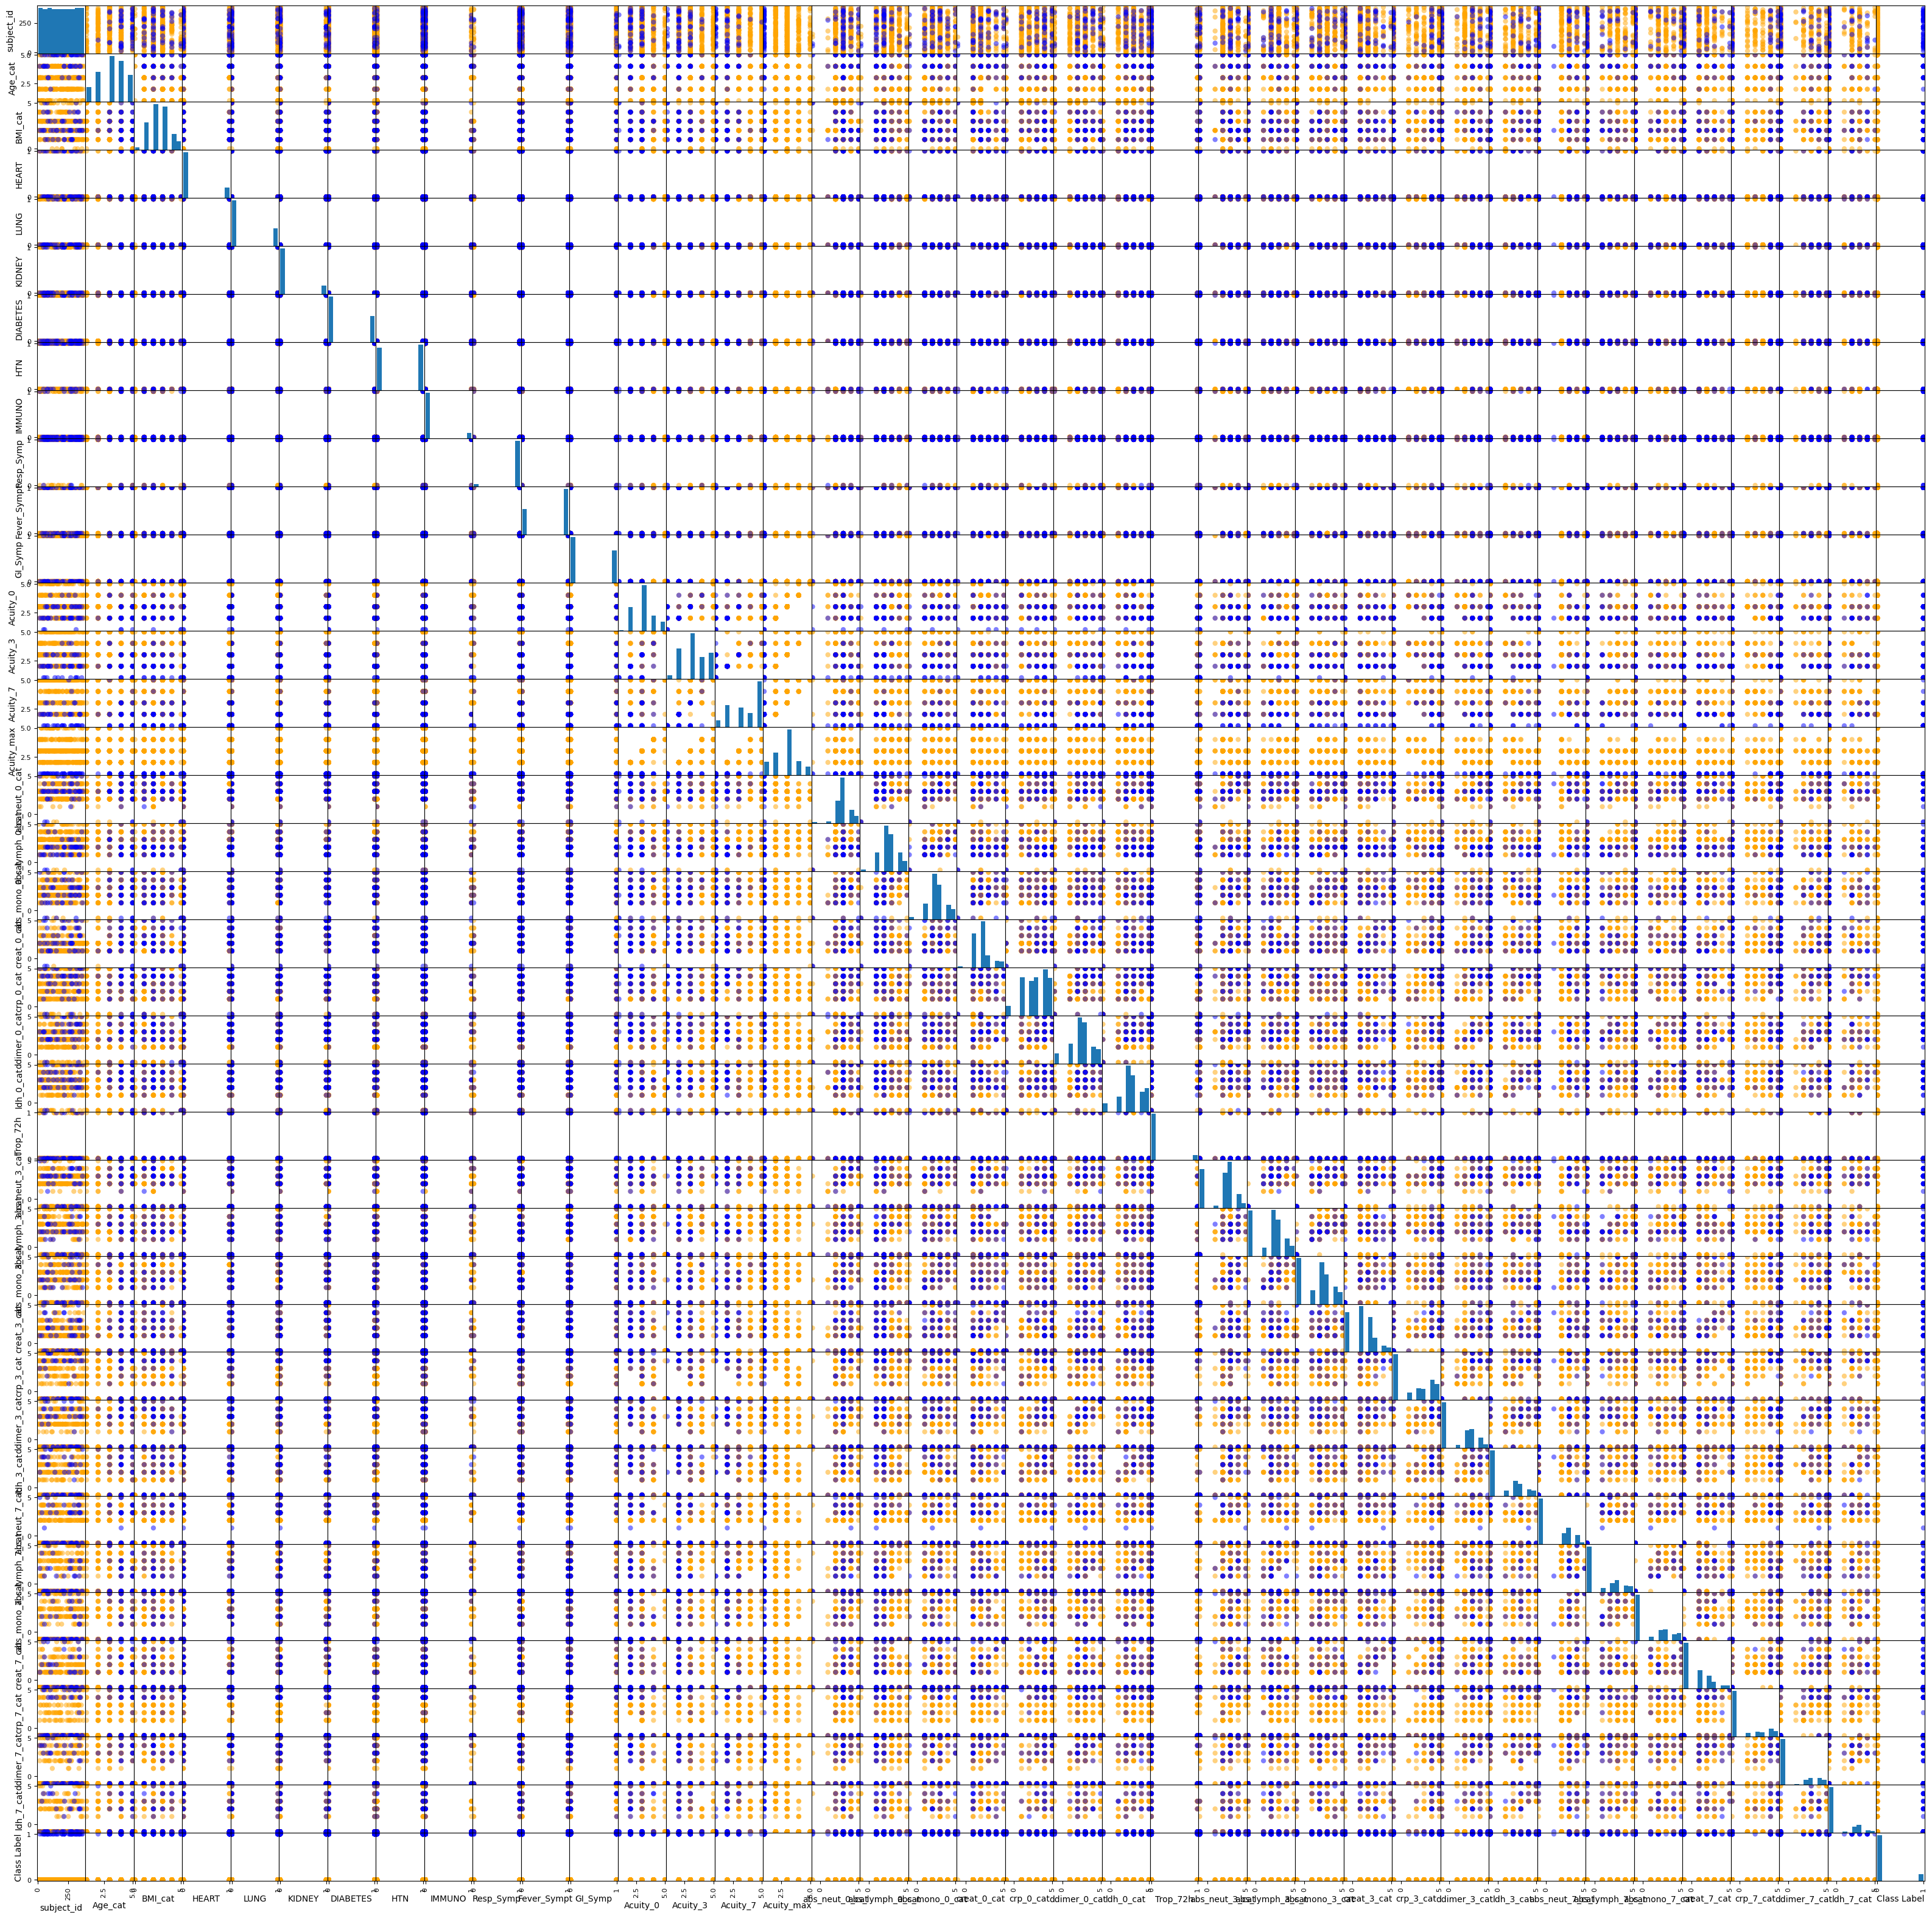

In [10]:
survive_colors = {0:'orange', 1:'blue'}
pd.plotting.scatter_matrix(dataset,figsize=(40,40),grid=True,
                           marker='o', c= dataset['Class Label'].map(survive_colors))

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [12]:
print(X.shape,X_train.shape,X_test.shape)

(384, 38) (307, 38) (77, 38)


In [13]:
classifier = xgb.XGBClassifier(random_state = 12345,learning_rate = 0.1, min_child_weight=10, max_depth =5, gamma=1,min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)

In [14]:
classifier.fit(X_train,Y_train)

[10:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, min_samples_split=0.1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [15]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [16]:
print("Accuracy is ",training_data_accuracy)

Accuracy is  0.9381107491856677


In [17]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [18]:
print("Accuracy is",test_data_accuracy)

Accuracy is 0.8701298701298701
